Initalization date of IFS forecast: 2024-08-20
Flight date: 2024-08-21
Flight index: HALO-20240821a


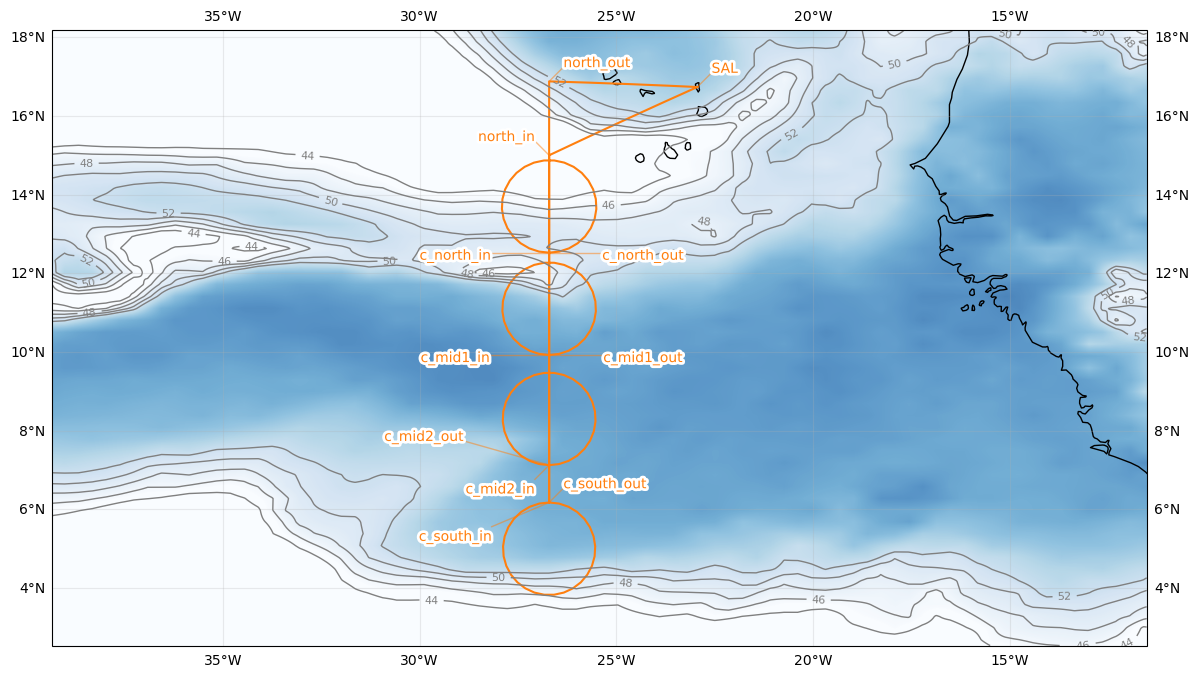

In [1]:
from orcestra.flightplan import sal, bco, LatLon, IntoCircle, path_preview, plot_cwv, to_kml, expand_path
from datetime import datetime
import intake
import easygems.healpix as egh

cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")

# Define dates for forecast initialization and flight

issued_time = datetime(2024, 8, 20, 12, 0, 0)
issued_time_str = issued_time.strftime('%Y-%m-%d')

flight_time = datetime(2024, 8, 21, 15, 0, 0)
flight_time_str = flight_time.strftime('%Y-%m-%d')
flight_index = f"HALO-{flight_time.strftime('%Y%m%d')}a"

print("Initalization date of IFS forecast: " + issued_time_str + "\nFlight date: " + flight_time_str + "\nFlight index: " + flight_index)
radius = 130e3
atr_radius = 70e3

airport=sal

mindelo = LatLon(lat=16.8778, lon=-24.995,label= "mindelo")
north_in = LatLon(lat=15.00, lon=-26.71,label= "north_in")
north_out = LatLon(lat=16.8778, lon=-26.71,label= "north_out")
south_tp = LatLon(lat=3., lon=-26.71,label= "south_tp")

c_north = LatLon(13.7,-26.71, "c_north")
c_south = LatLon(5.0, -26.71, "c_south")
c_mid1=LatLon(11.1,-26.71,"c_mid1")
c_mid2=LatLon(8.3,-26.71,"c_mid2")

leg_south = [
    airport, 
    north_in.assign(fl=410),
]

leg_circles = [
    IntoCircle(c_south.assign(fl=430), radius, 360),
    IntoCircle(c_mid2.assign(fl=430), radius, 360),
    IntoCircle(c_mid1.assign(fl=430), radius, 360),
    IntoCircle(c_north.assign(fl=450), radius, 360),
]

leg_home = [
     north_out.assign(fl=450),
     airport
]  

path = leg_south+leg_circles+leg_home

cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")
ds = cat.HIFS(datetime=issued_time).to_dask().pipe(egh.attach_coords)
cwv_flight_time = ds["tcwv"].sel(time=flight_time, method = "nearest")

ax = path_preview(path)
plot_cwv(cwv_flight_time, levels = [44, 46, 48, 50, 52])

path = expand_path(path, dx=10e3)

In [2]:
import pandas as pd
from dataclasses import asdict

pd.DataFrame.from_records(map(asdict, [sal,north_in,c_north,c_mid1,c_mid2,c_south,south_tp,north_out])).set_index("label")



,lat,lon,fl,time
label,,,,
SAL,16.734488,-22.943974,0.0,None
north_in,15.000000,-26.710000,NaN,None
c_north,13.700000,-26.710000,NaN,None
c_mid1,11.100000,-26.710000,NaN,None
c_mid2,8.300000,-26.710000,NaN,None
c_south,5.000000,-26.710000,NaN,None
south_tp,3.000000,-26.710000,NaN,None
north_out,16.877800,-26.710000,NaN,None


In [3]:
with open(f"{flight_index}.kml", "w") as f:
    f.write(to_kml(path))